In [67]:
import numpy as np
import pandas as pd
import matplotlib as plt
import json
import re
import seaborn as sns

In [68]:
claim_denied = pd.read_csv('claim_denied.txt',header = None, sep='-')
claim_denied.columns = ['case','platform','tag','other']
claim_denied['timeStamp'] = claim_denied.other.map(lambda x: float(x.split(',')[-1]))
claim_denied['customer_id'] = claim_denied.tag.map(lambda x: x.split(':')[-1].strip())
claim_denied.tag =  "Claim_Deined"
del claim_denied['other']
claim_denied.head()

,case,platform,tag,timeStamp,customer_id
0,e6cd8ce31a1d4d6,mobile_browser,Claim_Deined,1.483203e+09,99ccf1
1,e67b69c9b4554c0,pc_browser,Claim_Deined,1.483204e+09,b7aab4
2,58891c5466d240b,pc_browser,Claim_Deined,1.483211e+09,2bc68b
3,94270be3a7f440a,mobile_browser,Claim_Deined,1.483218e+09,48802d
4,a699b8150503414,pc_browser,Claim_Deined,1.483223e+09,3b8ce8


In [69]:
payment_completed = pd.read_csv("payment_completed_basic.txt",
                             header = None,
                             names = ['case' ,'platform', 'customer_id', 'timeStamp'])
payment_completed['tag'] = "Payment_Completed"

In [70]:
claim_accepted = pd.read_csv("claim_accepted_basic.txt",
                             header = None,
                             names = ['case', 'paid_amount' ,'platform', 
                                      'customer_id', 'timeStamp'])
claim_accepted['tag'] = "Claim_Accepted"
claim_accepted.head()

,case,paid_amount,platform,customer_id,timeStamp,tag
0,ea0f160a58c3496,19720.15,pc_browser,9bae09,1.483211e+09,Claim_Accepted
1,3be3afe8a7b04c5,13928.65,pc_browser,3d476d,1.483228e+09,Claim_Accepted
2,68ad8febf880477,15241.79,mobile_browser,dbbf0f,1.483304e+09,Claim_Accepted
3,e646f20fe849498,13331.07,mobile_app,c1b810,1.483381e+09,Claim_Accepted
4,6860630a3310419,14458.90,mobile_app,af1eee,1.483406e+09,Claim_Accepted


In [71]:
# quote_completed[quote_completed.customer_id=="a49ce0"]

In [72]:
# claim_accepted[claim_accepted.customer_id=="a49ce0"]

In [73]:
# len(claim_accepted.customer_id.unique().tolist())
claim_accepted.paid_amount.describe()

count    816301.000000
mean       8710.884243
std        2115.331869
min        2642.610000
25%        7327.870000
50%        8626.900000
75%        9955.940000
max       27097.440000
Name: paid_amount, dtype: float64

In [74]:
# claim_accepted.paid_amount.hist()
# 8710.8842430-2*2115

In [75]:
quote_completed = pd.read_csv('quote_completed_json.txt',
                  sep = '~',
                  header = None,
                  names = ['case','payload'])
quote_completed.head()

,case,payload
0,1368d40a4f6e455,"{""name"": ""Nicole Berry"", ""email"": ""Nicole Berr..."
1,6859e40fdc3f40d,"{""name"": ""Brandi Harris"", ""email"": ""Brandi Har..."
2,be4398c940284fe,"{""name"": ""Christopher Moody"", ""email"": ""Christ..."
3,0baaef67fe8a458,"{""name"": ""Loretta Steele"", ""email"": ""Loretta S..."
4,8fd309fecc6d43a,"{""name"": ""Shawn Cruz"", ""email"": ""Shawn Cruz@hi..."


In [76]:
quote_completed['name'] = quote_completed.payload.map(lambda x: json.loads(x)['name'])
quote_completed['email'] = quote_completed.payload.map(lambda x: json.loads(x)['email'])
quote_completed['gender'] = quote_completed.payload.map(lambda x: json.loads(x)['gender'])
quote_completed['age'] = quote_completed.payload.map(lambda x: json.loads(x)['age'])
quote_completed['home'] = quote_completed.payload.map(lambda x: json.loads(x)['home'])

In [77]:
quote_completed['home_type'] = quote_completed.home.map(lambda x: x['type'])
quote_completed['square_footage'] = quote_completed.home.map(lambda x: x['square_footage'])
quote_completed['number_of_bedrooms'] = quote_completed.home.map(lambda x: x['number_of_bedrooms'])
quote_completed['number_of_floors'] = quote_completed.home.map(lambda x: x['number_of_floors'])
quote_completed['household'] = quote_completed.payload.map(lambda x: json.loads(x)['household'])
del quote_completed['payload']
del quote_completed['home']

In [78]:
# tmp is the 
quote_completed_basic = pd.read_csv('quote_completed_basic.txt',
                  header = None,
                  names = ['case','platform','customer_id','street','suburb','timeStamp'])
quote_completed_basic['tag'] = "Quote_Completed"
quote_completed_basic.street = quote_completed_basic.street.map(lambda x:x.strip()) 
quote_completed_basic.suburb = quote_completed_basic.suburb.map(lambda x:x.strip()) 
quote_completed_basic.shape

(523322, 7)

In [79]:
len(quote_completed_basic.suburb.unique().tolist())
# there are only 490 unique suburbs in the data

490

In [80]:
# combine the basic info and the json payload together 
quote_completed = pd.merge(quote_completed, quote_completed_basic, on='case')

In [81]:
quote_completed.head()

,case,name,email,gender,age,home_type,square_footage,number_of_bedrooms,number_of_floors,household,platform,customer_id,street,suburb,timeStamp,tag
0,1368d40a4f6e455,Nicole Berry,Nicole Berry@hotmail.com,male,29,1,311.803620,2,1,"[{'name': 'Oscar Berry', 'age': 25, 'gender': ...",mobile_browser,99ccf1,66 Lake Jamieview,PSC,1.483194e+09,Quote_Completed
1,6859e40fdc3f40d,Brandi Harris,Brandi Harris@duncan.com,male,62,1,523.432957,2,1,"[{'name': 'Michael Harris', 'age': 12, 'gender...",pc_browser,9bae09,60 West Lisaside,Jamie Port Suite,1.483197e+09,Quote_Completed
2,be4398c940284fe,Christopher Moody,Christopher Moody@green.info,male,40,1,221.633267,3,1,[],pc_browser,b7aab4,120 Danielmouth,Unit Box,1.483201e+09,Quote_Completed
3,0baaef67fe8a458,Loretta Steele,Loretta Steele@patton-smith.biz,female,48,1,301.854950,3,1,"[{'name': 'Zachary Steele', 'age': 48, 'gender...",pc_browser,2bc68b,73 Edwardfurt,Michelle Crossing Suite,1.483205e+09,Quote_Completed
4,8fd309fecc6d43a,Shawn Cruz,Shawn Cruz@hines-hicks.com,female,33,0,265.802910,1,1,"[{'name': 'Rebecca Cruz', 'age': 13, 'gender':...",phone_call,1c425a,3 Patriciastad,Nguyen Tunnel,1.483208e+09,Quote_Completed


In [82]:
print(quote_completed.shape )
# quote_completed.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)

(523322, 16)


In [83]:
# Just take a look at the claim_started data set 
claim_started = pd.read_csv('claim_started_basic.txt',
                  header = None,
                  names = ['case','platform','customer_id','timeStamp'])
claim_started['tag'] = "Claim_Started"
claim_started.shape

(826795, 5)

In [84]:
# quote_completed[ (quote_completed.timeStamp <t0) & (quote_completed.customer_id == c0)] 
# claim_accepted[ (claim_accepted.timeStamp <t0) & (claim_accepted.customer_id == c0)] 
# claim_denied[ (claim_denied.timeStamp <t0) & (claim_denied.customer_id == c0)] 

### this data shows how many times each customer started their claims 

### Let's take a look at how many times they get denied and accepted each. 

In [85]:
tmp = claim_started.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp.columns.tolist()
tmp['Total'] = tmp.case
for item in list_:
    del tmp[item]

In [86]:
# claim_denied dataframe has problem that the customer_id has white spaces 
tmp_denied = claim_denied.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp_denied.columns.tolist()
tmp_denied['Denied'] = tmp_denied.case
for item in list_:
    del tmp_denied[item]

In [87]:
tmp_accepted = claim_accepted.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp_accepted.columns.tolist()
tmp_accepted['Accepted'] = tmp_accepted.case
for item in list_:
    del tmp_accepted[item]

In [88]:
tmp.reset_index(level=0, inplace=True)
tmp_denied.reset_index(level=0, inplace=True)
tmp_accepted.reset_index(level=0, inplace=True)

In [89]:
mg_df = pd.merge(tmp, tmp_accepted, how = 'left', on= 'customer_id')
mg_df = pd.merge(mg_df, tmp_denied, how = 'left', on= 'customer_id')

In [90]:
all_accepted = mg_df[(mg_df.Accepted == mg_df.Total)]
all_denied = mg_df[(mg_df.Denied == mg_df.Total)]
mixed = mg_df[(mg_df.Accepted >0) & (mg_df.Denied>0)]

In [91]:
# %matplotlib inline
mixed.head()

,customer_id,Total,Accepted,Denied
682,cac303,31,30.0,1.0
2334,8c8ab4,24,23.0,1.0
3333,aa159a,22,21.0,1.0
3751,46ff05,21,20.0,1.0
5797,85e5c6,18,17.0,1.0


In [92]:
101/claim_started.shape[0]
# 以上奇怪的数据仅占总数的万分之一

0.00012215845523981156

In [93]:
denied_started = pd.merge(tmp, tmp_denied, on= 'customer_id')
denied_started[denied_started.Denied > 1 ]

,customer_id,Total,Denied
81,46d885,2,2
93,f7dbe5,2,2
100,9b5212,2,2


In [94]:
count_payload = quote_completed.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = count_payload.columns.tolist()
count_payload['num_of_payload'] = count_payload.case
for item in list_:
    del count_payload[item]
more_than_one_payload  = set(count_payload[count_payload.num_of_payload > 1].index.tolist())

In [95]:
# mixed_payload  = set(mg_df.customer_id.tolist())
# mixed_payload - more_than_one_payload

In [96]:
claim_started.head()

,case,platform,customer_id,timeStamp,tag
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,Claim_Started
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,Claim_Started
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,Claim_Started
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,Claim_Started
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,Claim_Started


In [97]:
incoming_case = pd.merge(claim_started,payment_completed, how = "left", on  = ['timeStamp','customer_id'])
incoming_case.case_y = incoming_case.case_y.notnull().astype('int')
del incoming_case['platform_y']
del incoming_case['tag_y']
del incoming_case['tag_x']
# matched_payment_compelte indicate whether the claim_started is matched with a payment completed case
incoming_case.columns = ['case','platform','customer_id','timeStamp','matched_payment_complete']

incoming_case = pd.merge(incoming_case , all_accepted, how = 'left', on =['customer_id'])
incoming_case.Total = incoming_case.Total.notnull().astype('int')
incoming_case.rename(columns={'Total':'all_accepted'}, inplace=True)
del incoming_case['Accepted']
del incoming_case['Denied']
incoming_case.all_accepted = incoming_case.all_accepted.map({1:-1,0:0})

incoming_case = pd.merge(incoming_case , all_denied, how = 'left', on =['customer_id'])
incoming_case.Total = incoming_case.Total.notnull().astype('int')
incoming_case.rename(columns={'Total':'all_denied'}, inplace=True)
del incoming_case['Accepted']
del incoming_case['Denied']
# incoming_case.all_denied = incoming_case.all_denied.map({1:-1,0:0})

incoming_case['label'] = incoming_case.all_accepted + incoming_case.all_denied
del incoming_case['all_denied']
del incoming_case['all_accepted']
incoming_case.head()

,case,platform,customer_id,timeStamp,matched_payment_complete,label
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,1,1
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,1,-1
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,1,1
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,0,-1
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,1,1


In [98]:
# the label of 1 indicate fraud, -1 indicate not fraud, 0 indicate no entry for now 
# mixed[mixed.Denied ==  1].shape # there are all denied once 

In [99]:
claim_started.head(3)

,case,platform,customer_id,timeStamp,tag
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,Claim_Started
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,Claim_Started
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,Claim_Started


In [100]:
# for the mixed customers, we find out which cases are denied, find the case_id 
# label all these positives, then label all 0 to be negatives 
mixed_claims = pd.merge(claim_denied , mixed , on = ['customer_id'])
test = pd.merge(mixed_claims, claim_started, how = "outer", on = ['customer_id'])
denied_started_joined = test[test.timeStamp_x > test.timeStamp_y]

In [101]:
# denied_started_joined[denied_started_joined.customer_id=="297b2c"]

In [102]:
denied_case_started_time = denied_started_joined.groupby("case_x").max()[["timeStamp_y"]]

In [103]:
mixed_denied = pd.merge(denied_started_joined, denied_case_started_time, on=["case_x","timeStamp_y"])
mixed_denied["case"] = mixed_denied["case_y"]
del mixed_denied["case_y"]

In [104]:
# mixed_denied[["case","tag_y"]]

In [105]:
incoming_case_ = pd.merge(incoming_case,mixed_denied[["case","tag_y"]],how="left",on="case")
incoming_case_['tag_y'] = incoming_case_.tag_y.notnull().astype('int')
incoming_case_.label = incoming_case_.label + incoming_case_.tag_y

In [106]:
# label all the not labelled cases normal 
incoming_case_.label = incoming_case_.label.map({1:1,-1:-1,0:-1})
del incoming_case_["tag_y"]

In [107]:
incoming_case_.head()
# all the incoming cases are labelled correctly

,case,platform,customer_id,timeStamp,matched_payment_complete,label
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,1,1
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,1,-1
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,1,1
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,0,-1
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,1,1


In [108]:
# set(quote_completed.customer_id.unique()) - set(claim_started.customer_id.unique())
# many customers just make quotes and don't even start claim. 

In [109]:
# len(set(incoming_case_.customer_id.unique())-set(merge_df.customer_id.unique()))
# some times a customer makes claims right away. This is another kind of data anomaly

In [110]:
# now join the labelled data with the Json payload 
merge_df = pd.merge(incoming_case_, quote_completed, how = "left", on = ['customer_id',"platform"])
merge_df = merge_df[merge_df.timeStamp_x > merge_df.timeStamp_y]
idx = merge_df.groupby(['case_x'])['timeStamp_y'].transform(max) == merge_df['timeStamp_y']
merge_df = merge_df[idx]

In [111]:
t = claim_started[['customer_id','platform']].drop_duplicates().groupby("customer_id").count()
t= pd.merge(t,mixed,'inner',on='customer_id').sort_values('platform')
t = t[t.platform == 1 ]
# with these customers, it is impossible to link claim_started with corresponding quote_completed. 
# 35 of them, we can remove them 

In [112]:
final_ = pd.merge(merge_df,t[["customer_id","Denied"]],how = "left", on = "customer_id" )

In [113]:
final = final_[final_.Denied.isnull()]

In [114]:
final.label.isnull().sum()

0

In [115]:
# merge_df[merge_df.customer_id=="ca3f6c"]

In [116]:
# joined = merge_df[merge_df.timeStamp_x > merge_df.timeStamp_y]
# tmp = merge_df[merge_df.timeStamp_x < merge_df.timeStamp_y]

In [117]:
# merge_set = set(merge_df.case_x.unique().tolist())
# income_set = set(incoming_case.case.unique().tolist())
# joined_set = set(joined.case_x.unique().tolist())
# tmp_set =  set(tmp.case_x.unique().tolist())

In [118]:
# len(tmp_set-joined_set)
# when a customer is able to make a claim before the quote is completed

In [119]:
# len(tmp_set & joined_set)

In [120]:
# merge_df.groupby("case_x").max()[["timeStamp_y"]]

In [121]:
# max_time_y.loc["f7dbe5",]
# max_time_y.head()

In [122]:
del final['timeStamp_y']
del final['case_y']
del final['tag']

In [123]:
final = final.sort_values(by ='timeStamp_x' )
final.label = final.label.map({1:1,-1:0})
del final['Denied']

In [124]:
final.to_csv("final.csv",index= False,header=None)
# final.head()

In [125]:
final.label.isnull().sum()

0

In [126]:
# run a rough regression model

In [127]:
tmp = quote_completed.groupby("customer_id")[["case"]].count()
# the majority of the cases only have one payload 
# for the customers with more than one payload, don't conider them. They only constitute less than 2%. 

In [128]:
quote_completed_cleaned = pd.merge(quote_completed,tmp[tmp.case==1], how="inner",on="customer_id")

In [129]:
tmp = claim_accepted[['customer_id',"paid_amount"]].drop_duplicates()
money_vs_payload = pd.merge(quote_completed_cleaned,tmp,how="inner",on="customer_id")
money_vs_payload = money_vs_payload[['home_type',"square_footage",
                                     "number_of_bedrooms","number_of_floors","household",
                                     "suburb","paid_amount"]]
del money_vs_payload['household']
money_vs_payload.head()

,home_type,square_footage,number_of_bedrooms,number_of_floors,suburb,paid_amount
0,1,523.432957,2,1,Jamie Port Suite,19720.15
1,1,422.512583,2,1,Richardson Inlet Suite,12562.81
2,1,337.961510,2,1,Brittany Points,13928.65
3,1,308.806920,3,1,Laura Junctions Suite,8720.17
4,1,275.414135,3,1,Lori Stream,8385.35


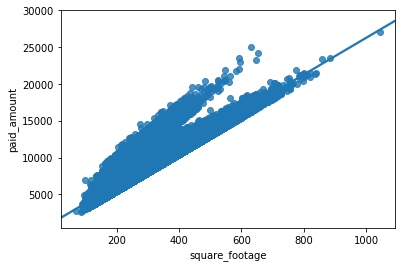

In [130]:
df = money_vs_payload 
# use the function regplot to make a scatterplot
sns.regplot(x=df["square_footage"], y=df["paid_amount"])

the following is the output from R
Call:
lm(formula = paid_amount ~ square_footage, data = money_vs_payload)

Coefficients:
   (Intercept)  square_footage  
       1262.36           25.04 
       
We can use this equation to calculate the estimated 

In [131]:
final["predicted_claim_money"] = 1262.36 +25.04*final["square_footage"]
final[final.label ==1].predicted_claim_money.sum()

90092789.63701384

In [132]:
final.label.sum()*claim_accepted.paid_amount.mean()

91107138.29375029

In [133]:
1341.89 is the width of prediction intervals

SyntaxError: invalid syntax (<ipython-input-133-57f06af7573c>, line 1)